# Reptile

In [23]:
# %pip install tensorflow

## Importing Libraries

In [1]:
# import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, explained_variance_score, mean_absolute_percentage_error
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

2024-05-07 05:21:24.752119: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 05:21:26.321595: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-07 05:21:30.064527: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-07 05:21:37.200530: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow info messages


## Loading Data

In [3]:
df = pd.read_csv('../22_HP/outputs/simulation_results_not.csv')

In [4]:
df = df.drop(columns = ['delay_LH_NodeA', 'delay_HL_NodeA'], axis=1)

In [5]:
df

,Vin,temp,pvdd,cqload,lmin,wmin,toxe_n,toxm_n,toxref_n,toxe_p,toxm_p,toxref_p,toxp_par,xj_n,xj_p,ndep_n,ndep_p,leakage
0,0.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,1.763446e-09
1,1.0,43.786431,1.049654,1.992558e-16,4.422860e-08,4.335549e-08,8.858098e-10,9.149308e-10,8.800085e-10,9.382331e-10,9.149568e-10,9.596845e-10,6.400032e-10,1.438907e-08,1.434486e-08,6.530156e+18,2.751990e+18,2.040866e-09
2,0.0,73.734086,0.936041,1.703362e-15,4.468047e-08,4.295989e-08,8.966653e-10,9.579161e-10,8.894931e-10,9.051161e-10,8.974949e-10,9.112459e-10,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18,6.515569e-10
3,1.0,73.734086,0.936041,1.703362e-15,4.468047e-08,4.295989e-08,8.966653e-10,9.579161e-10,8.894931e-10,9.051161e-10,8.974949e-10,9.112459e-10,6.536598e-10,1.335243e-08,1.435760e-08,6.696820e+18,2.698271e+18,1.886352e-09
4,0.0,53.497408,0.977805,2.900497e-15,4.542734e-08,4.700461e-08,8.951004e-10,9.207174e-10,8.560222e-10,9.582987e-10,9.510320e-10,9.448349e-10,6.471342e-10,1.439416e-08,1.428137e-08,6.482726e+18,2.732484e+18,5.722719e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1.0,81.517314,0.989291,1.079963e-15,4.737492e-08,4.576390e-08,9.024798e-10,8.716992e-10,8.717394e-10,9.042821e-10,9.679145e-10,8.903566e-10,6.401357e-10,1.417753e-08,1.408925e-08,6.055804e+18,2.983100e+18,1.999215e-09
19996,0.0,-50.718263,0.972025,2.675348e-15,4.308545e-08,4.571994e-08,9.087048e-10,8.717162e-10,9.293734e-10,9.071626e-10,8.870402e-10,8.568218e-10,6.378137e-10,1.345592e-08,1.464451e-08,6.590675e+18,2.836970e+18,1.429586e-10
19997,1.0,-50.718263,0.972025,2.675348e-15,4.308545e-08,4.571994e-08,9.087048e-10,8.717162e-10,9.293734e-10,9.071626e-10,8.870402e-10,8.568218e-10,6.378137e-10,1.345592e-08,1.464451e-08,6.590675e+18,2.836970e+18,1.255025e-09
19998,0.0,91.443514,1.025177,3.572204e-15,4.552864e-08,4.697390e-08,9.045228e-10,8.774425e-10,8.855997e-10,9.384903e-10,9.221000e-10,9.031884e-10,6.682387e-10,1.456677e-08,1.477978e-08,6.233399e+18,2.980221e+18,2.194838e-09


In [6]:
# Normalize data
scaler = StandardScaler()

In [7]:
x = df.drop('leakage', axis=1)
x.shape

(20000, 17)

In [8]:
x = scaler.fit_transform(x.values)
print(x[0])

[-1.          0.18078805  0.86864689 -1.61154477 -0.5423984  -1.1100848
 -0.48642597  0.5056319  -0.67856217  0.59256723 -0.1722708   1.26269638
 -0.46089947  0.84367392  0.72033654  0.14908407 -0.5150728 ]


In [9]:
y = pd.DataFrame(df['leakage'])
y = scaler.fit_transform(y.values.reshape(-1, 1) )
y.shape

(20000, 1)

In [10]:
print(y[0])

[-0.04065403]


First, let's reset the tensorflow graph,

In [11]:
tf.compat.v1.reset_default_graph()

Initialize network parameters,

In [35]:
num_hidden = 100

In [36]:
num_classes = 1
num_feature = x.shape[1]

Next, we define the placeholders for our input and output,

In [37]:
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

Randomly initialize our model parameters, 

In [38]:
w1 = tf.Variable(tf.random_uniform([num_feature, num_hidden]))
b1 = tf.Variable(tf.random_uniform([num_hidden]))

w2 = tf.Variable(tf.random_uniform([num_hidden, num_classes]))
b2 = tf.Variable(tf.random_uniform([num_classes]))

Perform feedforward operation to predict the output Yhat

In [39]:
#layer 1
z1 = tf.matmul(X, w1) + b1
a1 = tf.nn.tanh(z1)

#output layer
z2 = tf.matmul(a1, w2) + b2
Yhat = z2 

We use mean squared error as our loss function

In [40]:
loss_function = tf.reduce_mean(tf.square(Yhat - Y))

Minimize the loss using Adam Optimizer

In [41]:
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

Initialize tensorflow variables,

In [42]:
init = tf.global_variables_initializer()

## Single Hidden Layer

In [43]:
#number of epochs i.e training iterations
num_epochs = 50


#number of samples i.e number of shots
num_samples = 100 

#number of tasks
num_tasks = 5

#number of times we want to perform optimization
num_iterations = 10


#mini btach size
mini_batch = 20

In [44]:
losses = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

with tf.Session() as sess:
    sess.run(init)
    
    for e in range(num_epochs+1):
        for _ in range(num_tasks+1):

            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]

            # Randomly initialize weights (w) for each task
            w1 = tf.Variable(tf.random_uniform([num_feature, num_hidden]))
            b1 = tf.Variable(tf.random_uniform([num_hidden]))

            w2 = tf.Variable(tf.random_uniform([num_hidden, num_classes]))
            b2 = tf.Variable(tf.random_uniform([num_classes]))
            
            sess.run(tf.variables_initializer([w1, b1, w2, b2]))

            for _ in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
            # Get the updated weights after SGD on the task
            old_w1, old_b1, old_w2, old_b2 = sess.run([w1, b1, w2, b2])

            # Perform meta update
            epsilon = 0.1
            updated_w1 = old_w1 + epsilon * (w1 - old_w1)
            updated_b1 = old_b1 + epsilon * (b1 - old_b1)
            updated_w2 = old_w2 + epsilon * (w2 - old_w2)
            updated_b2 = old_b2 + epsilon * (b2 - old_b2)

            # Update the model parameters with new parameters
            sess.run([w1.assign(updated_w1), b1.assign(updated_b1),
                      w2.assign(updated_w2), b2.assign(updated_b2)])
        
        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
            
        # Calculate R2 score
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)
        
        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')

Epoch 0: Loss 0.4067983627319336, R2 Score 0.05596890765469176  MAE 0.49594791517272624, EV 0.05625234343304242, MAPE 1.8755071302162967

---------------------------------

Epoch 10: Loss 0.016717245802283287, R2 Score 0.9766049237183702  MAE 0.09269706743440242, EV 0.9766062333395741, MAPE 0.7196483819689764

---------------------------------

Epoch 20: Loss 0.0024071182124316692, R2 Score 0.996861415405526  MAE 0.03775811565008225, EV 0.9968847391252347, MAPE 0.37107574713513103

---------------------------------

Epoch 30: Loss 0.02606242708861828, R2 Score 0.9721006126068863  MAE 0.13169422722143106, EV 0.9765941667714673, MAPE 0.789558575730005

---------------------------------

Epoch 40: Loss 0.0008662685286253691, R2 Score 0.9989159569957294  MAE 0.0236171224757616, EV 0.9989464985032324, MAPE 0.09895338262116071

---------------------------------

Epoch 50: Loss 0.024841774255037308, R2 Score 0.9716715174654722  MAE 0.1306450707632746, EV 0.9749384640126713, MAPE 0.42481212010

### Visualizations

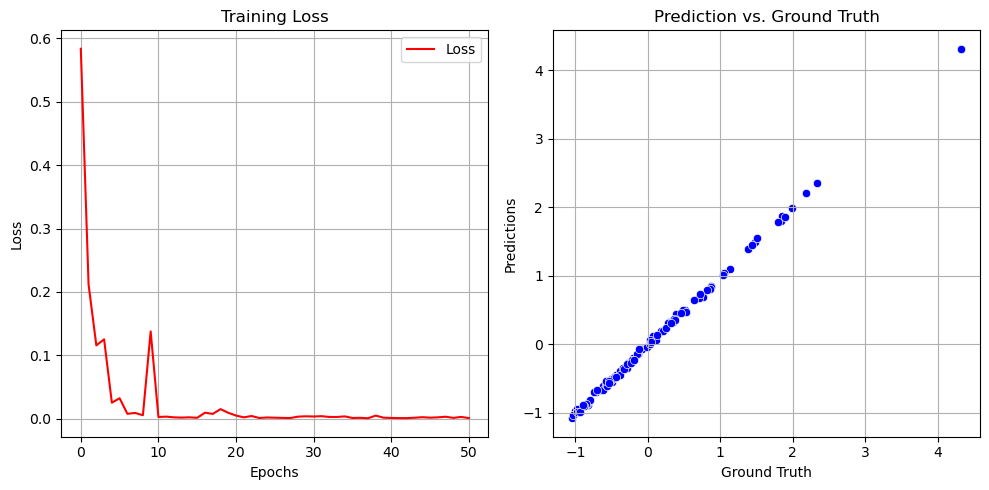

In [16]:
# Plot the training loop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs+1), losses, label='Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_sample_task.flatten(), y=y_pred.flatten(), color='b')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Prediction vs. Ground Truth')
plt.grid()
plt.tight_layout()
plt.show()


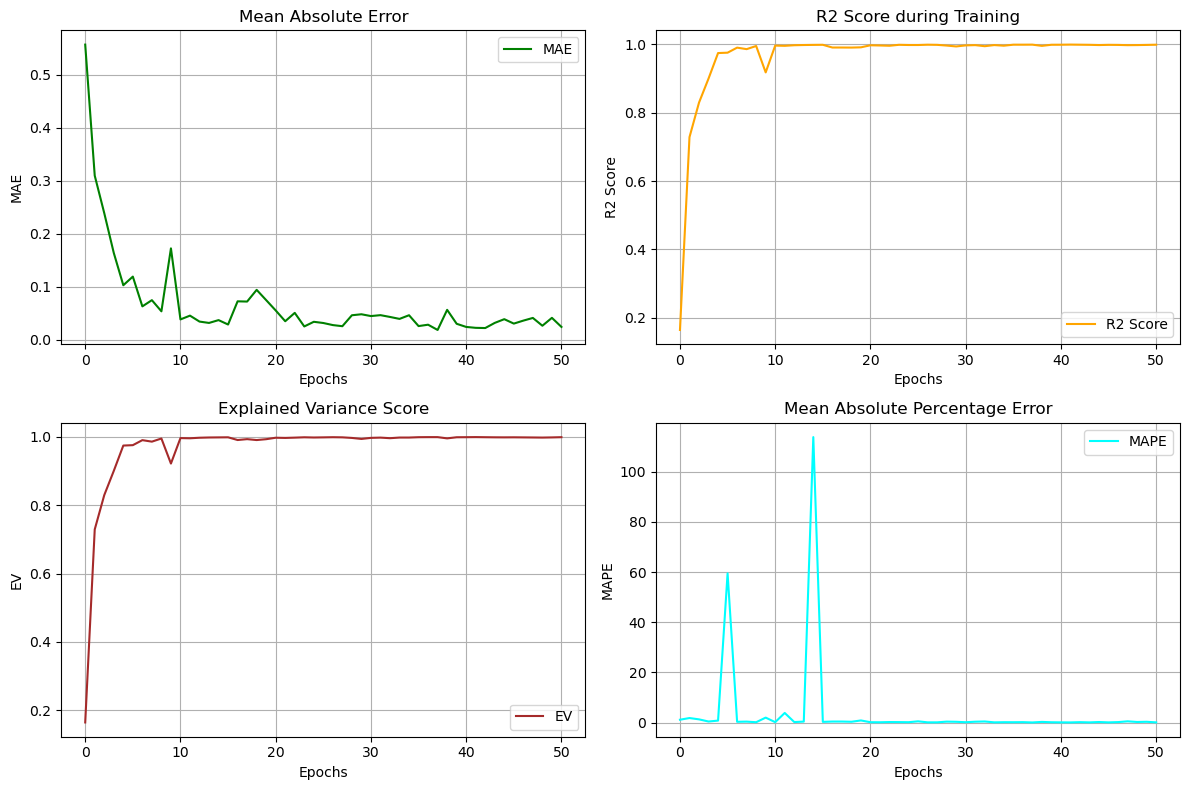

In [17]:
plt.figure(figsize=(12, 8))

# MAE
plt.subplot(2, 2, 1)
sns.lineplot(x=range(num_epochs+1), y=mae_scores, label='MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.grid()
plt.legend()

# R2
plt.subplot(2, 2, 2)
plt.plot(range(num_epochs+1), r2_scores, label='R2 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score during Training')
plt.legend()
plt.grid()

# EV
plt.subplot(2, 2, 3)
sns.lineplot(x=range(num_epochs+1), y=ev_scores, label='EV', color='brown')
plt.xlabel('Epochs')
plt.ylabel('EV')
plt.title('Explained Variance Score')
plt.grid()
plt.legend()

# MAPE
plt.subplot(2, 2, 4)
sns.lineplot(x=range(num_epochs+1), y=mape_scores, label='MAPE', color='cyan')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percentage Error')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## 3 Hidden Layers

In [12]:
# Initialize network parameters
num_hidden_layers = 3
num_hidden_units = 10
num_classes = 1
num_feature = x.shape[1]

# Reset the tensorflow graph
tf.compat.v1.reset_default_graph()

# Define placeholders for input and output
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# Initialize model parameters for each layer
weights = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                         num_hidden_units if i < num_hidden_layers else num_classes]))
           for i in range(num_hidden_layers + 1)]
biases = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
          for i in range(num_hidden_layers + 1)]

# Perform feedforward operations for each layer
layer_outputs = [X]
for i in range(num_hidden_layers + 1):
    layer_input = layer_outputs[-1]
    layer_output = tf.matmul(layer_input, weights[i]) + biases[i]
    layer_output = tf.nn.tanh(layer_output) if i < num_hidden_layers else layer_output
    layer_outputs.append(layer_output)

# Output of the neural network
Yhat = layer_outputs[-1]

# Loss function and optimizer
loss_function = tf.reduce_mean(tf.square(Yhat - Y))
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

# Initialize tensorflow variables
init = tf.global_variables_initializer()

# Training parameters
num_epochs = 50
num_samples = 100
num_tasks = 5
num_iterations = 10
mini_batch = 20
epsilon = 0.1  # Reptile update factor

### Training Loop

In [13]:
# Initialize empty lists to store loss and R2 scores
losses = []
r2_scores = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

# Initialize phi (meta-parameters)
phi_init = None

# Training loop
with tf.Session() as sess:
    sess.run(init)
    
    for e in range(num_epochs+1):
        for _ in range(num_tasks+1):  # Iterate over a new set of tasks in each epoch
            # Sample a new task batch (τ1, τ2, ..., τn)
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]
            
            # Randomly initialize weights (w) for each task
            weights_task = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                                           num_hidden_units if i < num_hidden_layers else num_classes]))
                            for i in range(num_hidden_layers + 1)]
            biases_task = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
                           for i in range(num_hidden_layers + 1)]
            sess.run(tf.variables_initializer(weights_task + biases_task))
            
            # Inner loop for gradient updates on tasks
            for k in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
            # Get the updated weights (w) after SGD on the task
            w_updated = sess.run(weights_task + biases_task)
            
            # Update phi using Reptile update rule
            if phi_init is None:
                phi_init = w_updated  # Initialize phi on the first iteration
            else:
                for i in range(len(phi_init)):
                    phi_init[i] += epsilon * (w_updated[i] - phi_init[i])

        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
      
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)
        
        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')


2024-05-07 05:21:45.627635: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Epoch 0: Loss 0.5837257504463196, R2 Score 0.16390139808003357  MAE 0.5570192607164869, EV 0.16410199737865028, MAPE 1.1527959233700742

---------------------------------

Epoch 10: Loss 0.002552518853917718, R2 Score 0.9964466500259183  MAE 0.03798545827895744, EV 0.9964700115008926, MAPE 0.18031249397929067

---------------------------------

Epoch 20: Loss 0.004804475232958794, R2 Score 0.9974009947230832  MAE 0.05493670522516206, EV 0.9975170646761115, MAPE 0.15753183001247953

---------------------------------

Epoch 30: Loss 0.0032912520691752434, R2 Score 0.9970180354920344  MAE 0.04432623883582382, EV 0.997124595073611, MAPE 0.15471632224699644

---------------------------------

Epoch 40: Loss 0.0010460125049576163, R2 Score 0.9989617686128563  MAE 0.023809324632662963, EV 0.9991071228256415, MAPE 0.09949129595775962

---------------------------------

Epoch 50: Loss 0.0008585460600443184, R2 Score 0.9989988480108275  MAE 0.02384797120912117, EV 0.999127886371742, MAPE 0.09062

### Visualizations

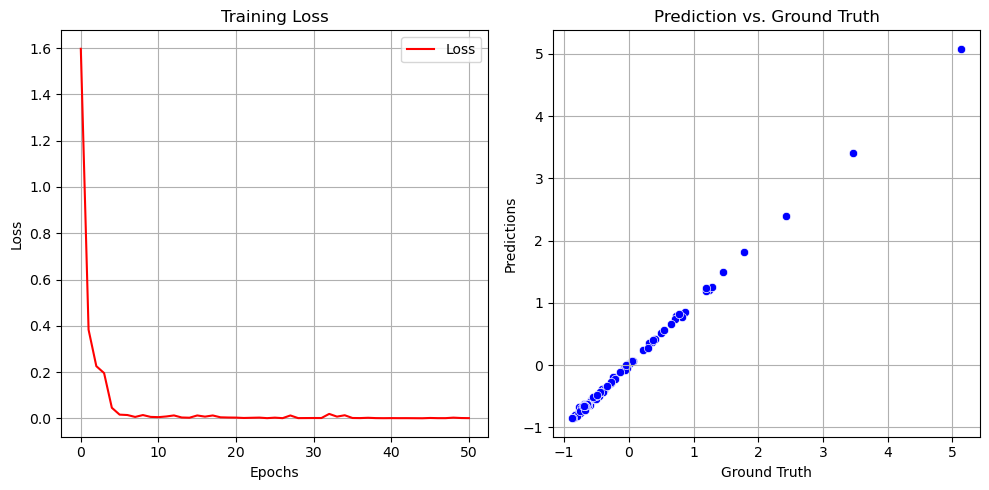

In [57]:
# Plot the training loop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs+1), losses, label='Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_sample_task.flatten(), y=y_pred.flatten(), color='b')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Prediction vs. Ground Truth')
plt.grid()
plt.tight_layout()
plt.show()

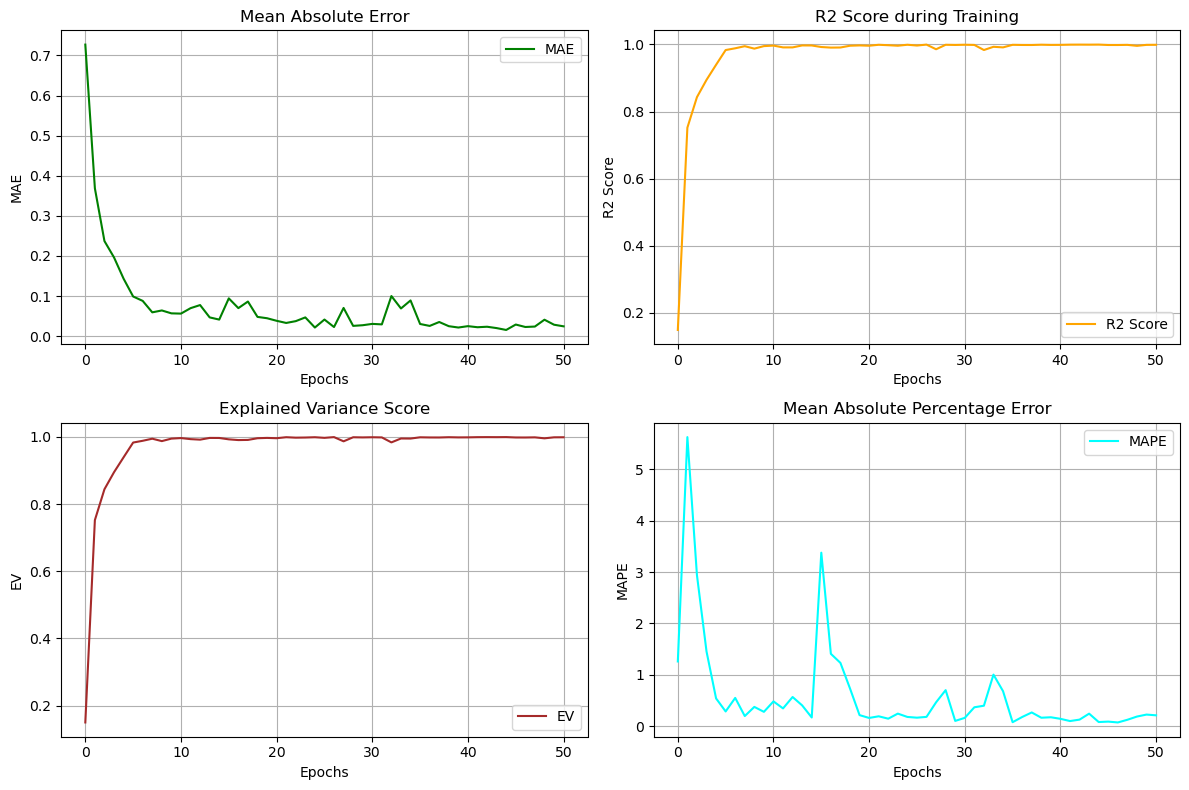

In [56]:
plt.figure(figsize=(12, 8))

# MAE
plt.subplot(2, 2, 1)
sns.lineplot(x=range(num_epochs+1), y=mae_scores, label='MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.grid()
plt.legend()

# R2
plt.subplot(2, 2, 2)
plt.plot(range(num_epochs+1), r2_scores, label='R2 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score during Training')
plt.legend()
plt.grid()

# EV
plt.subplot(2, 2, 3)
sns.lineplot(x=range(num_epochs+1), y=ev_scores, label='EV', color='brown')
plt.xlabel('Epochs')
plt.ylabel('EV')
plt.title('Explained Variance Score')
plt.grid()
plt.legend()

# MAPE
plt.subplot(2, 2, 4)
sns.lineplot(x=range(num_epochs+1), y=mape_scores, label='MAPE', color='cyan')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percentage Error')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## 5 Hidden Layers

In [63]:
# Initialize network parameters
num_hidden_layers = 5
num_hidden_units = 10
num_classes = 1
num_feature = x.shape[1]

# Reset the tensorflow graph
tf.compat.v1.reset_default_graph()

# Define placeholders for input and output
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# Initialize model parameters for each layer
weights = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                         num_hidden_units if i < num_hidden_layers else num_classes]))
           for i in range(num_hidden_layers + 1)]
biases = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
          for i in range(num_hidden_layers + 1)]

# Perform feedforward operations for each layer
layer_outputs = [X]
for i in range(num_hidden_layers + 1):
    layer_input = layer_outputs[-1]
    layer_output = tf.matmul(layer_input, weights[i]) + biases[i]
    layer_output = tf.nn.tanh(layer_output) if i < num_hidden_layers else layer_output
    layer_outputs.append(layer_output)

# Output of the neural network
Yhat = layer_outputs[-1]

# Loss function and optimizer
loss_function = tf.reduce_mean(tf.square(Yhat - Y))
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

# Initialize tensorflow variables
init = tf.global_variables_initializer()

# Training parameters
num_epochs = 50
num_samples = 100
num_tasks = 5
num_iterations = 10
mini_batch = 20
epsilon = 0.1  # Reptile update factor

### Training Loop

In [59]:
# Initialize empty lists to store loss and R2 scores
losses = []
r2_scores = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

# Initialize phi (meta-parameters)
phi_init = None

# Training loop
with tf.Session() as sess:
    sess.run(init)
    
    for e in range(num_epochs+1):
        for _ in range(num_tasks+1):  # Iterate over a new set of tasks in each epoch
            # Sample a new task batch (τ1, τ2, ..., τn)
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]
            
            # Randomly initialize weights (w) for each task
            weights_task = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                                           num_hidden_units if i < num_hidden_layers else num_classes]))
                            for i in range(num_hidden_layers + 1)]
            biases_task = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
                           for i in range(num_hidden_layers + 1)]
            sess.run(tf.variables_initializer(weights_task + biases_task))
            
            # Inner loop for gradient updates on tasks
            for k in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
            # Get the updated weights (w) after SGD on the task
            w_updated = sess.run(weights_task + biases_task)
            
            # Update phi using Reptile update rule
            if phi_init is None:
                phi_init = w_updated  # Initialize phi on the first iteration
            else:
                for i in range(len(phi_init)):
                    phi_init[i] += epsilon * (w_updated[i] - phi_init[i])

        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
      
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)
        
        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')


Epoch 0: Loss 0.7553571462631226, R2 Score 0.01479934774852909  MAE 0.6475346389177103, EV 0.014813698458202018, MAPE 1.0955152046646865

---------------------------------

Epoch 10: Loss 0.14277534186840057, R2 Score 0.8741994973320425  MAE 0.26930488164762206, EV 0.8745954561419176, MAPE 0.9347493883908083

---------------------------------

Epoch 20: Loss 0.019614027813076973, R2 Score 0.9701792522768865  MAE 0.10379394205156484, EV 0.9702034067586166, MAPE 0.7324596518738652

---------------------------------

Epoch 30: Loss 0.04665549844503403, R2 Score 0.8776929452672346  MAE 0.14878088413262885, EV 0.882315187581053, MAPE 0.6231464507952282

---------------------------------

Epoch 40: Loss 0.038350269198417664, R2 Score 0.9572967384711556  MAE 0.13885779542366747, EV 0.9579653837624366, MAPE 1.109769586131991

---------------------------------

Epoch 50: Loss 0.008252754807472229, R2 Score 0.9864998923452337  MAE 0.07139416306073307, EV 0.9865092618946072, MAPE 0.29577313750393

### Visualizations

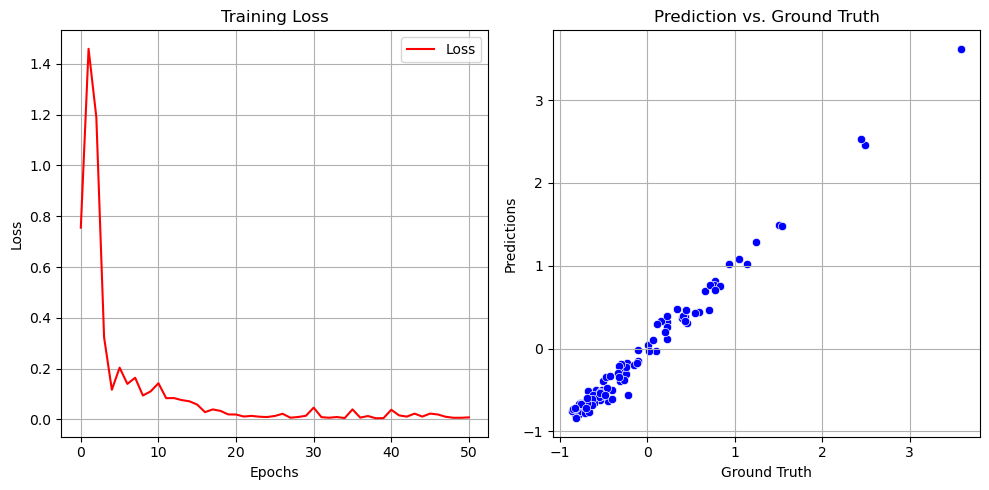

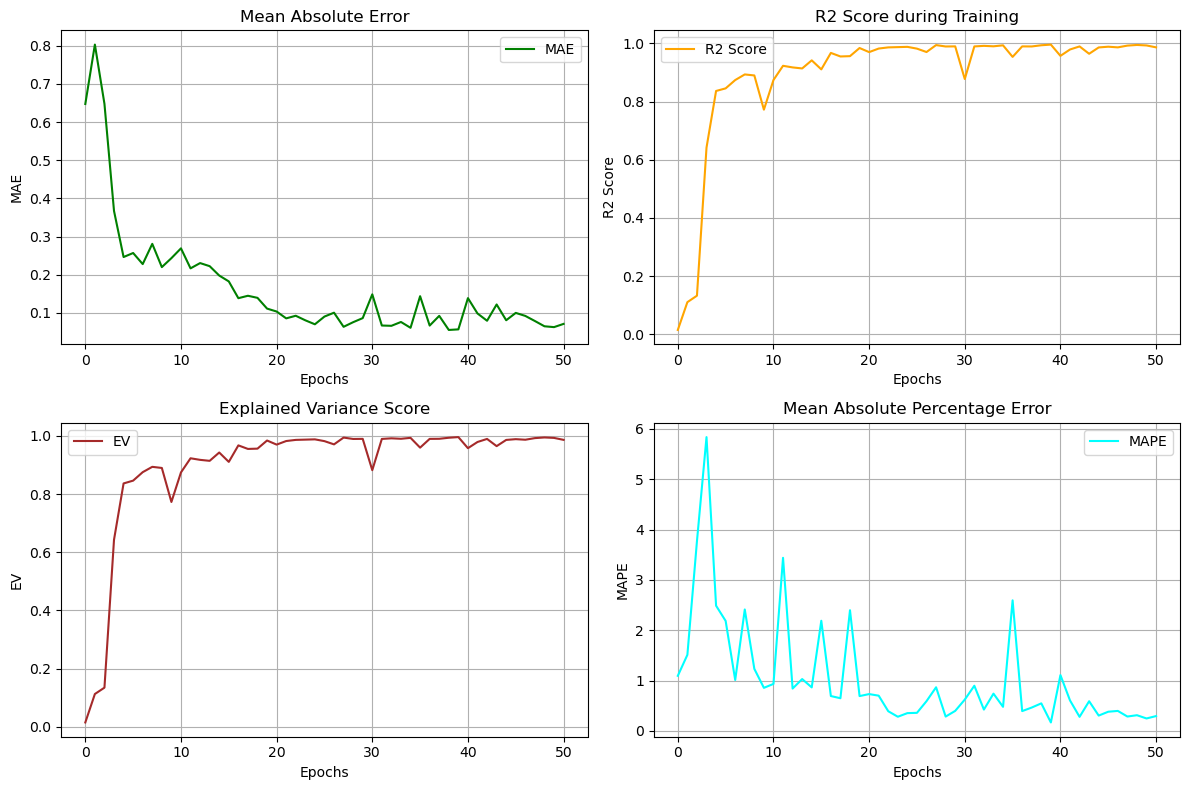

In [60]:
# Plot the training loop
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs+1), losses, label='Loss', color='r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_sample_task.flatten(), y=y_pred.flatten(), color='b')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.title('Prediction vs. Ground Truth')
plt.grid()
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 8))

# MAE
plt.subplot(2, 2, 1)
sns.lineplot(x=range(num_epochs+1), y=mae_scores, label='MAE', color='green')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.grid()
plt.legend()

# R2
plt.subplot(2, 2, 2)
plt.plot(range(num_epochs+1), r2_scores, label='R2 Score', color='orange')
plt.xlabel('Epochs')
plt.ylabel('R2 Score')
plt.title('R2 Score during Training')
plt.legend()
plt.grid()

# EV
plt.subplot(2, 2, 3)
sns.lineplot(x=range(num_epochs+1), y=ev_scores, label='EV', color='brown')
plt.xlabel('Epochs')
plt.ylabel('EV')
plt.title('Explained Variance Score')
plt.grid()
plt.legend()

# MAPE
plt.subplot(2, 2, 4)
sns.lineplot(x=range(num_epochs+1), y=mape_scores, label='MAPE', color='cyan')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percentage Error')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [64]:

# Define the network architecture
num_hidden_layers = 3
num_hidden_units = 10
num_classes = 1
num_feature = x.shape[1]

# Reset the TensorFlow graph
tf.compat.v1.reset_default_graph()

# Define placeholders for input and output
X = tf.placeholder(tf.float32, shape=[None, num_feature])
Y = tf.placeholder(tf.float32, shape=[None, num_classes])

# Initialize model parameters for each layer
weights = [tf.Variable(tf.random_uniform([num_feature if i == 0 else num_hidden_units,
                                         num_hidden_units if i < num_hidden_layers else num_classes]))
           for i in range(num_hidden_layers + 1)]
biases = [tf.Variable(tf.random_uniform([num_hidden_units if i < num_hidden_layers else num_classes]))
          for i in range(num_hidden_layers + 1)]

# Perform feedforward operations for each layer
layer_outputs = [X]
for i in range(num_hidden_layers + 1):
    layer_input = layer_outputs[-1]
    layer_output = tf.matmul(layer_input, weights[i]) + biases[i]
    layer_output = tf.nn.tanh(layer_output) if i < num_hidden_layers else layer_output
    layer_outputs.append(layer_output)

# Output of the neural network
Yhat = layer_outputs[-1]

# Loss function and optimizer
loss_function = tf.reduce_mean(tf.square(Yhat - Y))
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss_function)

# Initialize TensorFlow variables
init = tf.global_variables_initializer()

# Training parameters
num_epochs = 50
num_samples = 100
num_tasks = 5
num_iterations = 10
mini_batch = 20
epsilon = 0.1  # Reptile update factor

# Initialize empty lists to store loss and scores
losses = []
r2_scores = []
mae_scores = []
ev_scores = []
mape_scores = []

# Training loop for Reptile
with tf.Session() as sess:
    sess.run(init)
    
    for e in range(num_epochs+1):
        for _ in range(num_tasks):  # Iterate over a new set of tasks in each epoch
            # Sample a new task batch (τ1, τ2, ..., τn)
            task_indices = np.random.choice(len(x), size=num_samples, replace=False)
            x_sample_task = x[task_indices]
            y_sample_task = y[task_indices]
            
            # Inner loop for gradient updates on tasks
            for _ in range(num_iterations):
                for i in range(0, num_samples, mini_batch):
                    x_minibatch = x_sample_task[i:i+mini_batch]
                    y_minibatch = y_sample_task[i:i+mini_batch]
                    sess.run(optimizer, feed_dict={X: x_minibatch, Y: y_minibatch})
            
            # Get the updated weights (w) after SGD on the task
            w_updated = sess.run(weights + biases)
            
            # Update meta-parameters using Reptile update rule
            if e == 0:
                phi_init = w_updated  # Initialize phi on the first iteration
            else:
                for i in range(len(phi_init)):
                    phi_init[i] += epsilon * (w_updated[i] - phi_init[i])

        loss = sess.run(loss_function, feed_dict={X: x_sample_task, Y: y_sample_task})
        losses.append(loss)
      
        y_pred = sess.run(Yhat, feed_dict={X: x_sample_task})
        r2 = r2_score(y_sample_task, y_pred)
        mae = mean_absolute_error(y_sample_task, y_pred)
        ev = explained_variance_score(y_sample_task, y_pred)
        mape = mean_absolute_percentage_error(y_sample_task, y_pred)

        r2_scores.append(r2)
        mae_scores.append(mae)
        ev_scores.append(ev)
        mape_scores.append(mape)
        
        if e % 10 == 0:
            print("Epoch {}: Loss {}, R2 Score {}  MAE {}, EV {}, MAPE {}\n".format(e, loss, r2, mae, ev, mape))
            print('---------------------------------\n')


Epoch 0: Loss 1.0956140756607056, R2 Score 0.0841478274587163  MAE 0.7103659617092118, EV 0.08420666918027364, MAPE 1.1683231232784461

---------------------------------

Epoch 10: Loss 0.006871521007269621, R2 Score 0.9922997554220997  MAE 0.0634069696220999, EV 0.9923079787225589, MAPE 18.71585215677252

---------------------------------

Epoch 20: Loss 0.0020638261921703815, R2 Score 0.9976342217210671  MAE 0.03503191961267681, EV 0.9976342666957617, MAPE 0.2698026363584147

---------------------------------

Epoch 30: Loss 0.0029268497601151466, R2 Score 0.9982286602241883  MAE 0.044107489990422515, EV 0.9988126591014358, MAPE 0.24874014775610234

---------------------------------

Epoch 40: Loss 0.001381467911414802, R2 Score 0.9979664133016168  MAE 0.029494267312944498, EV 0.9980083692522671, MAPE 0.190385512671437

---------------------------------

Epoch 50: Loss 0.0027087191119790077, R2 Score 0.9975871289138907  MAE 0.03873982934387196, EV 0.9976527051285102, MAPE 0.731865001